In [1]:
import numpy as np
import matplotlib.pyplot as plt

Mean =  -0.7177278224296195
stdev =  117.52197065726281
Bins =  50


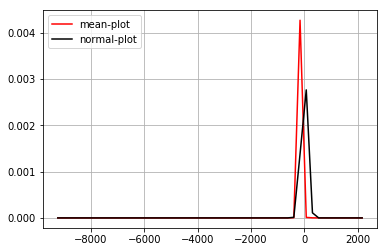

In [2]:
#parameters for X and Y
meanX = 0
sdX = 1
meanY = 0
sdY = 1

N = 10000

k = 10000
count = 0
smpl_mean = []

while (count < k):
    np.random.seed((k+1)*count)
    #Z=X/Y
    Xdata = np.random.normal(meanX,sdX,N)
    Ydata = np.random.normal(meanY,sdY,N)
    Zdata = Xdata / Ydata
    smpl_mean.append(np.mean(Zdata))
    count += 1

mean_smpl_mean = np.mean(smpl_mean)
stdev_smpl_mean = np.sqrt(np.mean((smpl_mean-mean_smpl_mean)*(smpl_mean-mean_smpl_mean)))

print("Mean = ", mean_smpl_mean)
print("stdev = ", stdev_smpl_mean)

density = True
bins = 50
hist, bin_edges = np.histogram(smpl_mean, bins, density=density)

print("Bins = ", bins)

f = (1/(stdev_smpl_mean*np.sqrt(2*np.pi)))*np.exp(-(bin_edges[0:-1]-mean_smpl_mean)*(bin_edges[0:-1]-mean_smpl_mean)/(2*(stdev_smpl_mean*stdev_smpl_mean)))

plt.figure()
plt.plot(bin_edges[0:-1], (hist), color="red", label = "mean-plot")
plt.plot(bin_edges[0:-1], f, color="black", label = "normal-plot")
plt.grid()
plt.legend()
plt.show()